# **Customer Segmentation: Clustering**

In this project I will be performing unsupervised clustering of the data of customer's records in E-commerce. Clustering segmentation is practice of unsupervised learning that separating groups into groups that have similarities among customer in each cluster. I will practice to find what's the best how much segmentation that can be made for customer, identify the similarities, and optimize the significant of each customer into business. It can helped to make a promotion based on customer's segmentation and modify products according to each customers.

In this project, I will use dataset from Kaggle "Customer Segmentation Dataset" (https://www.kaggle.com/datasets/yasserh/customer-segmentation-dataset/data)


# **1. Import Library & Dataset Loading**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Import Library
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn.metrics import silhouette_score
import os


In [12]:
#Input Data
df = pd.read_excel("/content/drive/MyDrive/project dicoding/Online Retail.xlsx")
print("Number of Data Points:", len(df)) #Finding how many number of Data points in this dataset.
df.head()

Number of Data Points: 541909


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


**Dataset Description**



*   InvoiceNo: a 6 digit number uniquely assigned to each transaction. If this code starts with letter 'c', it indicated a cancellation
*   StockCode: a 5 digit number uniquely assigned to each distinct product.
* Description: Product name.
* InvoiceData: The day and time when each transaction was generated.
* UnitPrice: Product price per unit.
* CustomerID: a 5 digit number uniquely assigned to each
* Country: The name of the country where each customer resides.

# **2. Data Cleaning**

Before we jump into the data cleaning, I will find the information and description of the Data. I also will find the statistic of each column.

In [13]:
#EDA
#Data structure of the number of rows and columns, and the type of data in each column
df.info() #Informasi data
df.describe() #deskripsi data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [14]:
#Statistic and description for column type object
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
Country,541909,38,United Kingdom,495478


**The conlusion**

Number of rows: 541909
Number of Column: 8

*   InvoiceNo: tipe data objek dan tidak ada missing value dalam data. Data ini mempunyai 25900 unique value dengan Invoice no 573585 paling sering muncul. Hal ini perlu dilakukan analisis lebih lanjut, apakah invoice no tersebut sama karena transaksi di waktu yang sama atau merupakan duplikat value.
* StockCode: Merupakan kode setiap barang sehingga wajar jika ada kode yang sama.
* Quantity: Jumlah produk yang dibeli setiap transaksi dengan rata-rata orang membeli sebanyak 9 sampai 10 produk. Jumlah maksimal nilai pada kuantity perlu dilakukan analisis lebih lanjut karena jumlah data yang terlalu besar dan di luar rata-rata.
* InvoiceDate: Tanggal dan jam pembelian, data ini akan dipisah menjadi bulan, tanggal, serta jam untuk analisis lebih detail terkait kapan orang membeli produk ynag banyak untuk menentukan strategi bisnis kedepannya.
* UnitPrice: Harga produk tiap unit. Perlu dilakukan analisa lebih lanjut karena ada kemungkinan outlier.
* CustomerID: Customer ID harus kita ubah ke data objek karena merupakan value unique untuk melihat tipe customer. Terdapat missing value pada kolom ini sehingga perlu tindak lanjut mengingat customer ID merupakan identifikasi unik untuk menganalisa tiap customer.
* Country: Terdapat  38 unique values dengan UK mendominasi data.

In [15]:
#Memeriksa data yang hilang atau duplikat
print('Missing values: ', df.isna().sum().sum()) #cek data hilang
print('duplicate values: ', df.duplicated().sum()) #cek data yang double
print('Descripsi nilai kosong: ', df.isnull().sum()) #cek di kolom mana data yang kosong

Missing values:  136534
duplicate values:  5268
Descripsi nilai kosong:  InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


Terdapat 136534 data yang hilang serta nilai duplikat sebanyak 5268. Untuk nilai kosong pada customer ID dan description, kita akan hapus untuk menjaga data agar tetap akurat.

In [16]:
# Finding duplicate rows (keeping all instances)
duplicate_rows = df[df.duplicated(keep=False)]

# Sorting the data by certain columns to see the duplicate rows next to each other
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])

# Displaying the first 10 records
duplicate_rows_sorted.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom


Jika dilihat dari data, terdapat kemungkinan error karena dilihat dari Description, quantity, invoice date, serta customer ID ada kemungkinan error. Maka untuk data duplikat kita bisa drop juga.

In [17]:
df.drop_duplicates(inplace=True) # Menghapus data duplikat
df.dropna(inplace=True) # Menghapus data kosong
df.isnull().sum() # Memperlihatkan total data kosong

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [18]:
#Jumlah row di dataframe
df.shape[0]

401604

**Handing cancellation purchase**

If this code starts with letter 'c', it indicates a cancellation.

akan dilakukan analisa untuk lebih memahami pembelian cancellation.

In [20]:
# Filter out the rows with InvoiceNo starting with "C" and create a new column indicating the transaction status.
df['Transaction_status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

#Analysze the characteristics of these rows (considerin the new column)
cancelled_transactions=df[df['Transaction_status'] == 'Cancelled']
cancelled_transactions.describe().drop('CustomerID', axis=1)

,Quantity,InvoiceDate,UnitPrice
count,8872.000000,8872,8872.000000
mean,-30.774910,2011-06-27 09:06:05.024797184,18.899512
min,-80995.000000,2010-12-01 09:41:00,0.010000
25%,-6.000000,2011-03-23 11:23:45,1.450000
50%,-2.000000,2011-07-11 13:51:00,2.950000
75%,-1.000000,2011-10-06 20:36:00,4.950000
max,-1.000000,2011-12-09 11:58:00,38970.000000
std,1172.249902,NaN,445.190864


Terdapat 8872 value yang merupakan transaksi cancellation.
Transaksinya bernilai negatif berarti bener kalau ini merupakan data return atau yang di-cancel.

In [21]:
# Finding the percentage of cancellation products.
cancelled_percentage = cancelled_transactions.shape[0] / df.shape[0] * 100

print(f"Percentage of cancellation products: {cancelled_percentage:.2f}%")

Percentage of cancellation products: 2.21%


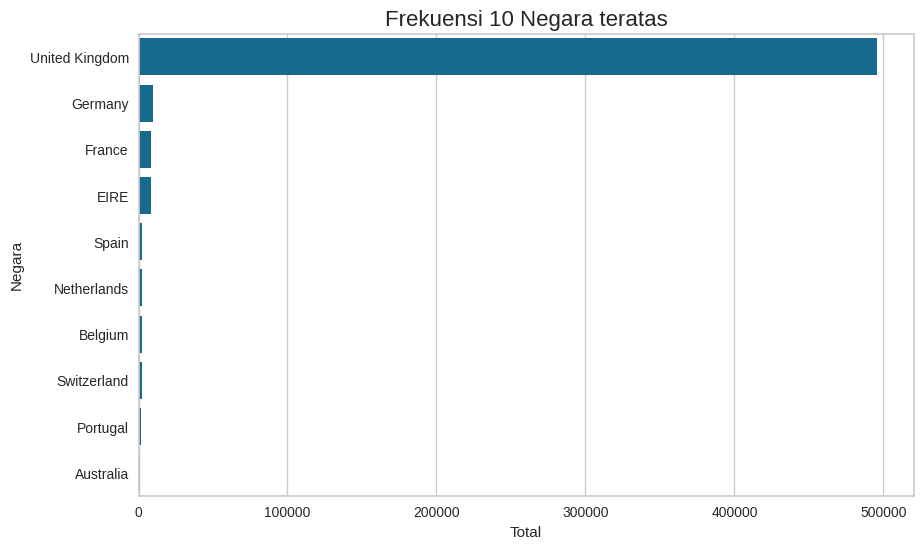

In [ ]:
# Menghitung distribusi negara. Diambil sepuluh besar untuk melihat distribusi.
country_count = df.Country.value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=country_count.values, y=country_count.index)
plt.title("Frekuensi 10 Negara teratas", fontsize=16)
plt.xlabel("Total")
plt.ylabel("Negara")
plt.show()

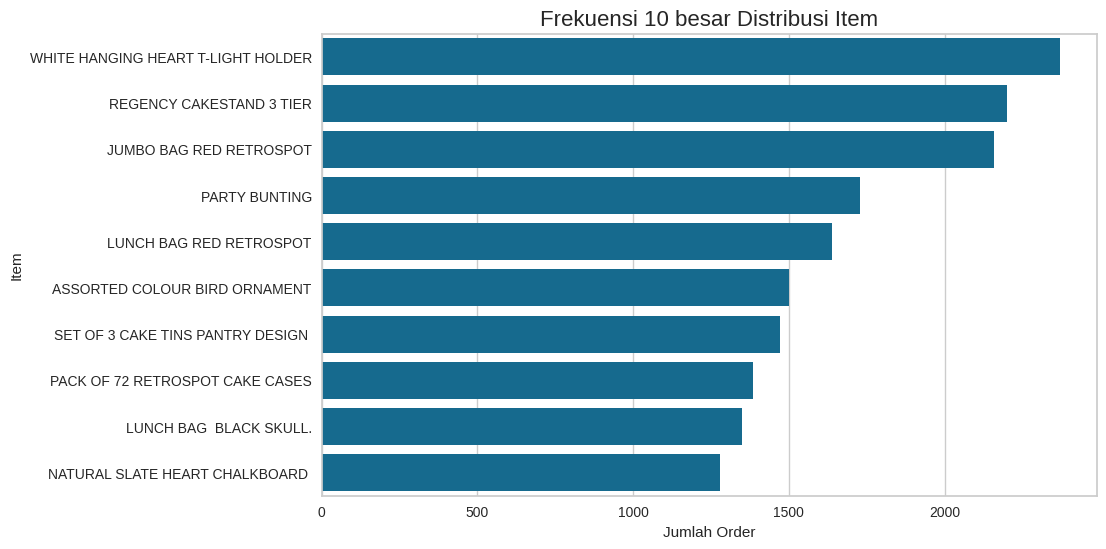

In [ ]:
description_count = df["Description"].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=description_count.values, y=description_count.index)
plt.title("Frekuensi 10 besar Distribusi Item", fontsize=16)
plt.xlabel("Jumlah Order")
plt.ylabel("Item")
plt.show()

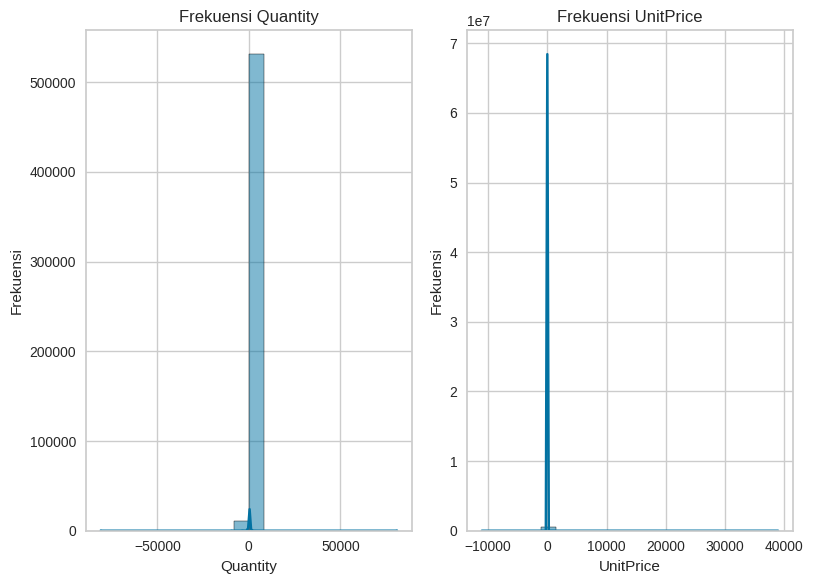

In [ ]:
# Membuat histogram frekuensi Quantity, UnitPrice
plt.figure(figsize=(12, 6))
for i, column in enumerate(["Quantity", "UnitPrice"], 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f"Frekuensi {column}")
    plt.xlabel(column)
    plt.ylabel("Frekuensi")
plt.tight_layout()
plt.show()

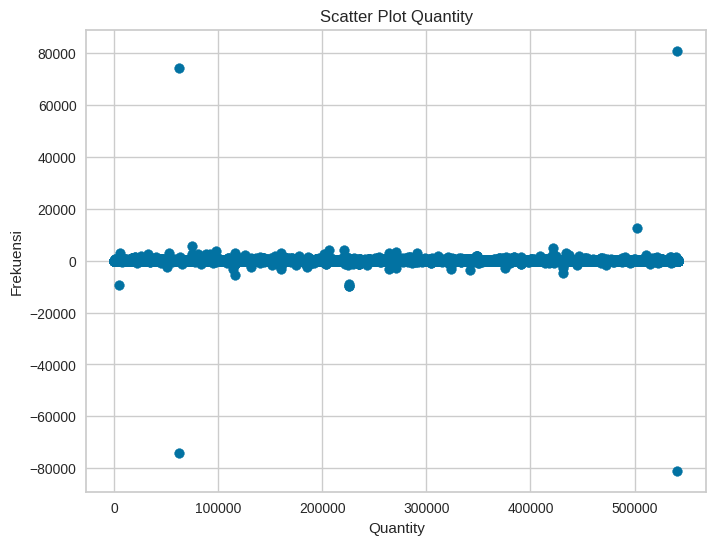

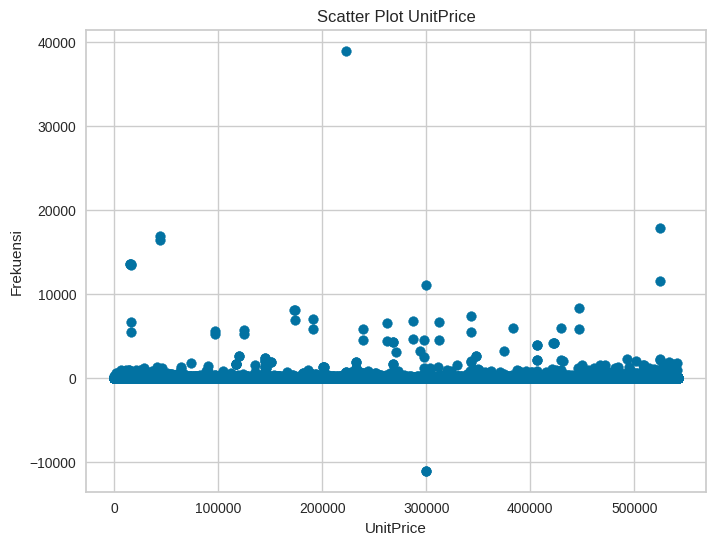

In [ ]:
#Scatter plot Quantity, UnitPrice
for column in ["Quantity", "UnitPrice"]:
    plt.figure(figsize=(8, 6))
    plt.scatter(df.index, df[column])
    plt.title(f"Scatter Plot {column}")
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.show()

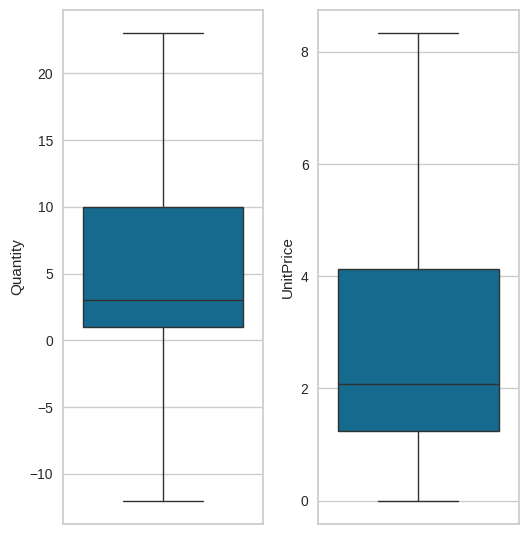

In [ ]:
# Boxplot Quantity, UnitPrice, dan TotalHarga
plt.subplot(1, 3, 1)
sns.boxplot(y=df["Quantity"], data=df, showfliers=False)

plt.subplot(1, 3, 2)
sns.boxplot(y=df["UnitPrice"], data=df, showfliers=False)

plt.tight_layout()
plt.show()

Dari histogram dapat ditunjukan bahwa item "White Hanging Heart T-Light Holder" merupakan item yang paling banyak dibeli oleh customer. Diikuti oleh "Regency Cakestand 3 Tier" dan "Jumbo Bag Red RetroSpot".

Selanjutkan akan dilakukan analisis untuk UnitPrice dan Quantity dan membuat kolom baru yang memperlihatkan total harga yang dibeli dari tiap customer dengan judul TotalHarga.

Dapat terlihat dari historgram, terdapat data Quantity yang nominalnya di bawah nol. Akan diproses lebih lanjut pada data Preprocessing.

# **5. Data Preprocessing**

In [ ]:
# Drop CustomerID, InvoiceNo, and StockCode columns

df.drop(['InvoiceNo', 'CustomerID', 'StockCode', 'InvoiceDate', 'Description'], axis = 1, inplace=True)
df

KeyError: "['InvoiceNo', 'CustomerID', 'StockCode', 'InvoiceDate'] not found in axis"

In [ ]:
# Drop rows with negative value
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

In [ ]:
# Remove outliers dalam Quantity
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Quantity'] >= (Q1 - 1.5 * IQR)) & (df['Quantity'] <= (Q3 + 1.5 * IQR))]

In [ ]:
# Remove outliers in UnitPrice
Q1 = df['UnitPrice'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['UnitPrice'] >= (Q1 - 1.5 * IQR)) & (df['UnitPrice'] <= (Q3 + 1.5 * IQR))]

In [ ]:
# Buat kolom baru TotalHarga
df["TotalHarga"] = df["Quantity"] * df["UnitPrice"]

In [ ]:
df.describe()

,Quantity,UnitPrice,Country,TotalHarga
count,45338.000000,45338.000000,45338.000000,45338.000000
mean,8.756010,2.052442,28.279457,15.424198
std,7.036971,1.435698,10.519733,16.199180
min,1.000000,0.001000,0.000000,0.001000
25%,3.000000,0.850000,23.000000,4.680000
50%,6.000000,1.650000,35.000000,10.500000
75%,12.000000,2.950000,35.000000,19.800000
max,25.000000,6.000000,36.000000,147.000000


In [ ]:
le = LabelEncoder()
categories = ['Country']
for category in categories:
        df[category] = le.fit_transform(df[category].astype(str))
df

,Quantity,UnitPrice,Country,TotalHarga
0,6,2.55,22,15.30
1,6,3.39,22,20.34
2,8,2.75,22,22.00
3,6,3.39,22,20.34
4,6,3.39,22,20.34
...,...,...,...,...
541807,10,1.79,22,17.90
541808,10,1.79,22,17.90
541810,10,1.79,22,17.90
541811,10,1.79,22,17.90


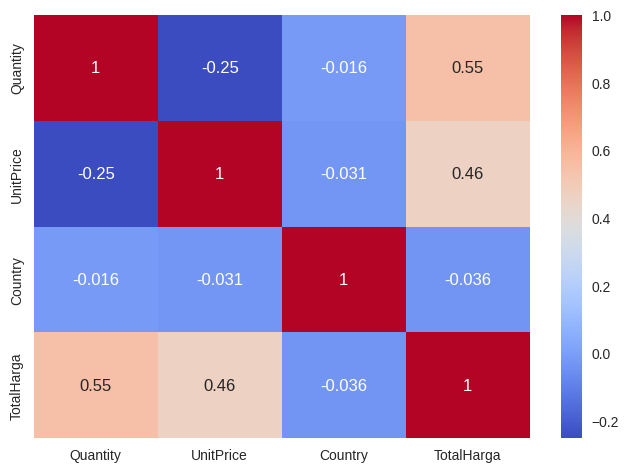

In [ ]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

In [ ]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)

Elbow Method to determine the number of clusters to be formed:


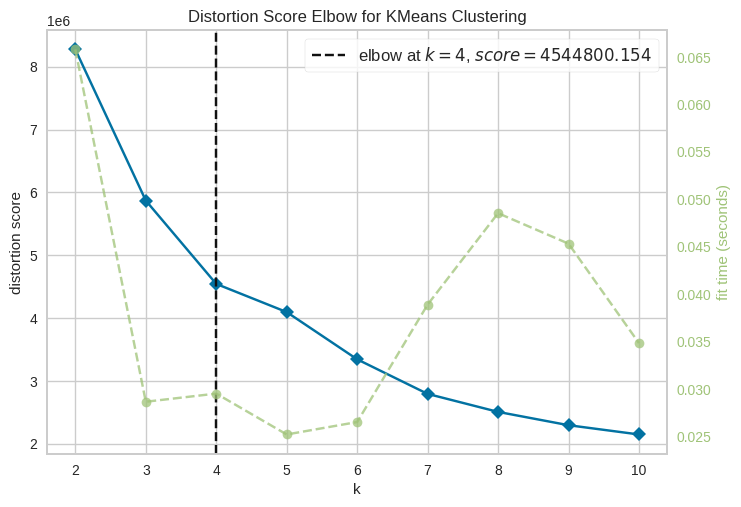

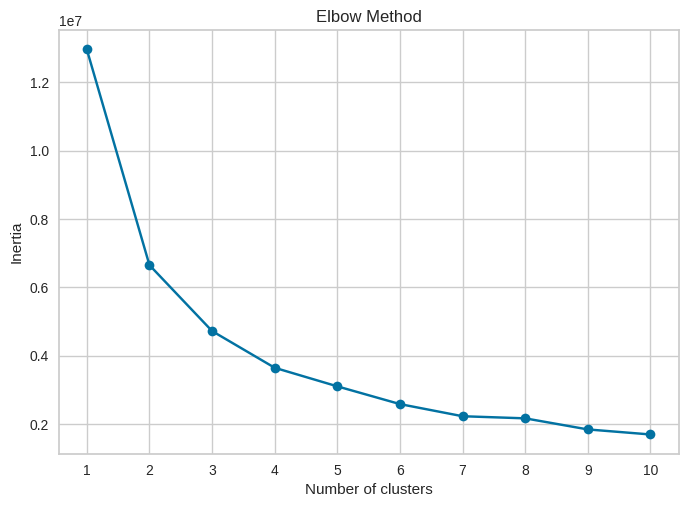

In [ ]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df)
Elbow_M.show()
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(train)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df)

# Mendapatkan label cluster
labels = kmeans.labels_

# Mendapatkan jumlah cluster
k = 3

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(df, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = df[labels == cluster_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_Quantity = cluster_data['Quantity'].mean()  # Rata-rata Annual Income
        mean_UnitPrice = cluster_data['UnitPrice'].mean()  # Rata-rata Spending Score
        mean_TotalHarga = cluster_data['TotalHarga'].mean()  # Rata-rata Spending Score

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Quantity: {mean_Quantity:.2f}")
        print(f"Rata-rata UnitPrice: {mean_UnitPrice:.2f}")
        print(f"Rata-rata TotalHarga: {mean_TotalHarga:.2f}")

# Analisis karakteristik setiap cluster
analyze_clusters(df, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Quantity: 3.80
Rata-rata UnitPrice: 1.70
Rata-rata TotalHarga: 4.72

Cluster 2:
Rata-rata Quantity: 15.49
Rata-rata UnitPrice: 2.89
Rata-rata TotalHarga: 36.71

Cluster 3:
Rata-rata Quantity: 19.50
Rata-rata UnitPrice: 4.17
Rata-rata TotalHarga: 77.93


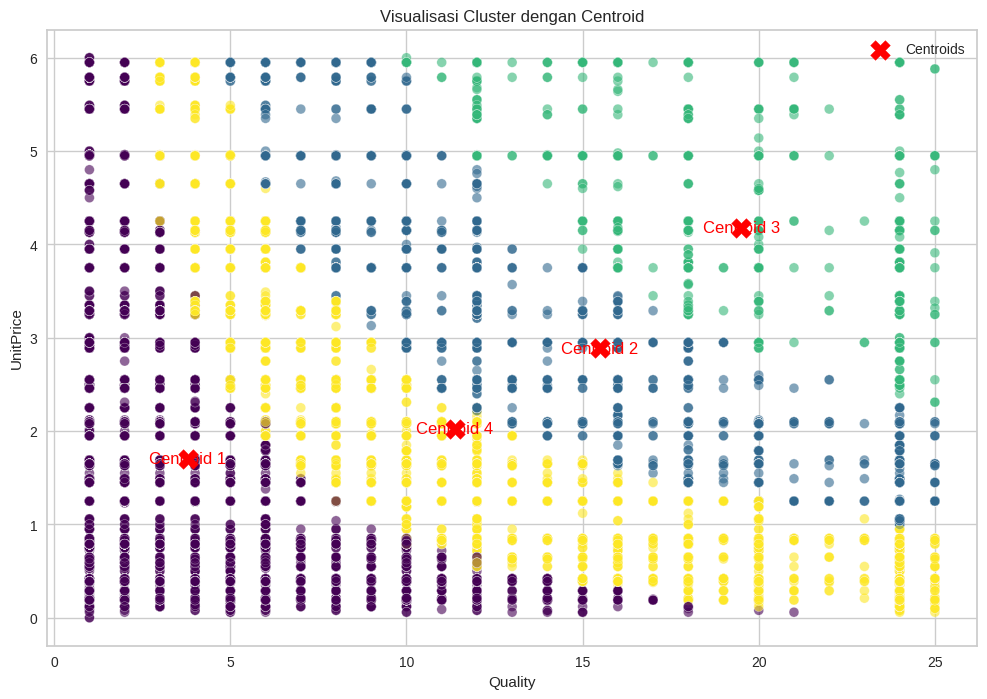

Nilai Centroids:
Centroid 1: Quantity = 3.80, UnitPrice = 1.70
Centroid 2: Quantity = 15.49, UnitPrice = 2.89
Centroid 3: Quantity = 19.50, UnitPrice = 4.17
Centroid 4: Quantity = 11.37, UnitPrice = 2.02


In [ ]:
# Menentukan posisi centroid
centroids = kmeans.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(12, 8))

# Plot data
plt.scatter(df['Quantity'], df['UnitPrice'], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid
# Accessing centroid coordinates using numerical indices
plt.scatter(centroids[:, df.columns.get_loc('Quantity')], centroids[:, df.columns.get_loc('UnitPrice')], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    # Accessing centroid coordinates using numerical indices
    plt.text(centroid[df.columns.get_loc('Quantity')], centroid[df.columns.get_loc('UnitPrice')], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Quality')
plt.ylabel('UnitPrice')
plt.legend()

plt.show()

# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    # Accessing centroid coordinates using numerical indices and column names for clarity
    print(f"Centroid {i+1}: Quantity = {centroid[df.columns.get_loc('Quantity')]:.2f}, UnitPrice = {centroid[df.columns.get_loc('UnitPrice')]:.2f}")

## **b. Evaluasi Model Clustering**

<ipython-input-61-0c20eb7bd5d6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=df["Cluster_data"], palette="viridis") # Using a built-in palette


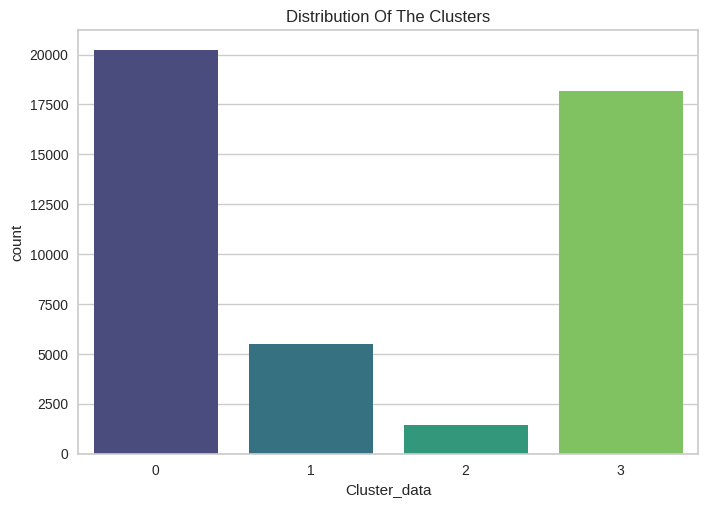

In [ ]:
#Plotting countplot of clusters
df['Cluster_data'] = labels # Assigning cluster labels to a new column in the DataFrame
pl = sns.countplot(x=df["Cluster_data"], palette="viridis") # Using a built-in palette
pl.set_title("Distribution Of The Clusters")
plt.show()

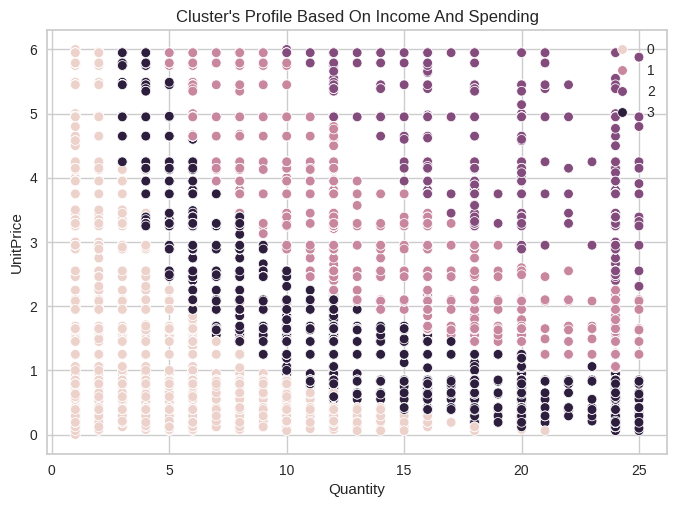

In [ ]:
pl = sns.scatterplot(data = df,x=df["Quantity"], y=df["UnitPrice"],hue=df["Cluster_data"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

## **c. Feature Selection (Opsional)**

In [ ]:
#count sillhoutte score
silhouette_avg = silhouette_score(df, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.37607342256544807


In [ ]:
# prompt: save the result into csv

# Save the result into csv
df.to_csv('clustered_data.csv', index=False)
